# Исследование объявлений о продаже квартир

Данное исследование направлено на опредление рыночной стоимости объектов недвижимости в городе Санкт-Петербург и соседних населенных пунктах.
В качестве исхоных данных получен датафрейм с информацией о размещенных объявлениях на сайте Яндекс.Недвижимость в период с ноября 2014-го по май 2019-го года.
Главные этапы исследования будут включать:  
1. Ознакомление с датафреймом и информацией внутри.
2. Выполнение предобработки данных если потребуется.
3. Категоризацию данных если потребуется.
4. Проведение исследования.
5. Общий вывод.  

Данные пункты рассмотрим поотдельности в следующих главах.  
Целью исследование является определения параметров по нахождению рыночной стоимости жилья.  
Так же данное исследование ляжет в основу построения автоматизированной системы по поиску аномалий и выявления мошеннических действий на сервисе.

### Общая информация об исходных данных. 

В первую очередь, ознакомимся с полученными данными и попробуем выявить недостаток данных.  
Выведем первые 10 строчек датафрейма.

In [139]:
import pandas as pd
data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


По первым строкам датафрейма можно увидеть множественные пропуски в данных. Так же можно увидеть, что в столбце `first_day_exposition` время равно нулю, можно откинуть эту часть. Есть вероятность, что в стобце `locality_name` могут быть неявные дубликаты. Необходимо проверить этот столбец. Посмотрим на инфо и содержащиеся данные в столбцах.

In [140]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Видно, что во многих столбцах пропущены данные. В столбце `is_apartement` данных совсем мало и они имеют тип `object`, тогда как ожидалось `boolean`. Это необходимо проверить. Так же можно сказать, что во многих столбцах содержаться целочисленные данные, тогда как им присвоен тип `float`. Есть пропуски в столбце `days_exposition`. Так как данный столбец целевой, то необходимо заполнить недостоющие данные. Так же необходимо заполнить данные в `kitchen_area`, `balcony`, `floors_total`, `last_price` и остальных столбцах.

Построим гистограммы для всех столбцов таблицы.

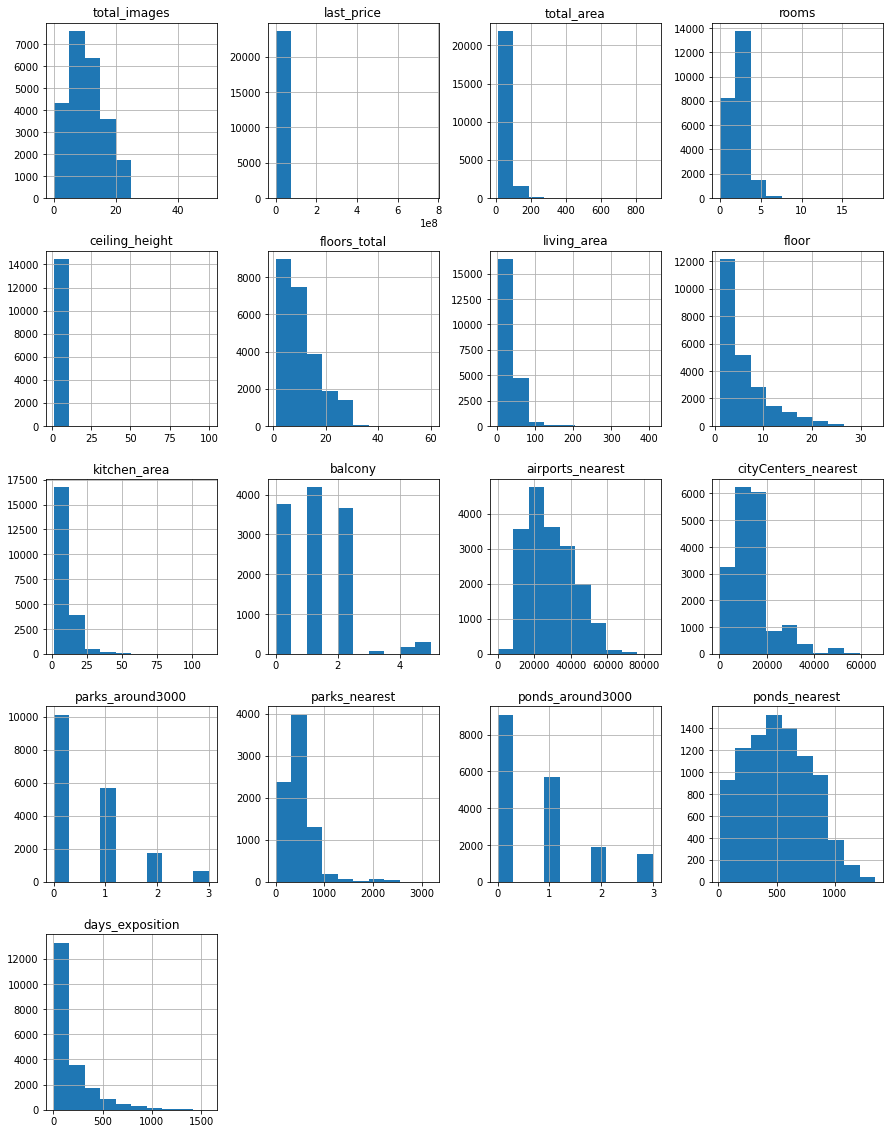

In [141]:
import matplotlib.pyplot as plt

data.hist(figsize=(15, 20))

plt.show()

По данным гистрограммам видно несколько проблем.  
Данные из стобца `balcony` говорят о том, что есть квартиры с дробным количеством балконов. Это надо проверить.  
Данные в столбце `last-price` расположены около единицы. Необходимо проверить этот столбец.

Далее проведем детальное изучение пропусков в столбцах.

#### Изучим столбец `is_apartment` на предмет аномалий, пропусков и т.д.

In [142]:
data.is_apartment.unique()

array([nan, False, True], dtype=object)

В имеющихся данных в столбце `is_appartement` есть значения `True` и `False`. Можно предположить, что пропуск `NaN` появились в связи с тем, что при занесении данных пользователи с квартирами не указывали параметр принадлежности к категории апартаменты. Таким образом можно заменить отсутствующие данные на `False` для всех `NaN`.

#### Изучим пропуски в столбце `days_exposition` на предмет аномалий, пропусков и т.д.

In [143]:
data.days_exposition.isna().sum()

3181

In [144]:
data.days_exposition.describe()

count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

В данном столбце имеется 3181 пропуск данных. По всей видимости, это техническая ошибка, связанная с тем, что на момент выгрузки базы данных некоторые квартиры все еще не были сняты с публикации. С учетом того, что количество дней публикации должно быть не менее 1 дня, то можно заполнить данные от последнего опубликованного объявления в столбце `first_day_exposition` плюс 1 день. Остальные публикации будем считать до этой же даты, но от даты их публикации.

#### Изучим столбец `kitchen_area`на предмет аномалий, пропусков и т.д.

In [145]:
data.kitchen_area.describe()

count    21421.000000
mean        10.569807
std          5.905438
min          1.300000
25%          7.000000
50%          9.100000
75%         12.000000
max        112.000000
Name: kitchen_area, dtype: float64

In [146]:
data['kitchen_area'].corr(data['total_area']) #определим есть ли корреляция между площадью кухни и общей площадью квартиры

0.6091211711198318

In [147]:
data.loc[data['kitchen_area'] < 4] #посмотрим количество квартир с площадь кухни менее 4м2

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
906,15,2600000.0,27.00,2017-07-10T00:00:00,1,2.75,23.0,18.0,18,NaN,...,2.00,0.0,Санкт-Петербург,22131.0,17459.0,0.0,NaN,1.0,411.0,10.0
2165,15,3180000.0,25.00,2019-03-21T00:00:00,1,2.50,25.0,17.0,17,NaN,...,3.00,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,19.0
3078,17,6000000.0,43.00,2018-11-12T00:00:00,2,2.90,4.0,29.3,2,NaN,...,3.20,NaN,Санкт-Петербург,22357.0,5247.0,1.0,319.0,2.0,831.0,37.0
3195,17,2690000.0,25.60,2018-02-19T00:00:00,1,2.50,9.0,16.2,7,NaN,...,3.80,NaN,Санкт-Петербург,11033.0,11281.0,0.0,NaN,1.0,283.0,99.0
6084,6,770000.0,18.00,2017-10-16T00:00:00,1,NaN,5.0,13.0,4,NaN,...,3.00,NaN,Тихвин,NaN,NaN,NaN,NaN,NaN,NaN,90.0
6262,9,3100000.0,24.00,2018-06-25T00:00:00,2,3.00,5.0,16.0,5,NaN,...,2.00,NaN,Санкт-Петербург,31960.0,4914.0,2.0,426.0,1.0,936.0,54.0
7047,9,2800000.0,21.00,2017-09-23T00:00:00,1,NaN,5.0,14.9,3,NaN,...,3.80,NaN,Санкт-Петербург,19676.0,3974.0,0.0,NaN,3.0,518.0,108.0
7950,3,5967734.0,66.40,2017-02-07T00:00:00,2,NaN,4.0,44.4,2,False,...,2.89,NaN,Санкт-Петербург,44870.0,20802.0,0.0,NaN,0.0,NaN,335.0
8712,6,14948000.0,42.70,2017-09-15T00:00:00,2,2.80,4.0,27.5,4,NaN,...,3.70,NaN,Санкт-Петербург,25212.0,3914.0,1.0,290.0,1.0,860.0,167.0
8729,9,2200000.0,18.40,2018-08-20T00:00:00,1,2.52,3.0,14.0,3,NaN,...,2.40,NaN,Пушкин,20710.0,30687.0,0.0,NaN,1.0,155.0,59.0


In [148]:
data.query('kitchen_area < 4')['kitchen_area'].count()

29

Среди данных есть площади кухонь менее 4м2. Возможно, это связано с тем, что для квартир типа студии площадь считается как площадь непосредственно занимаемая кухонным гарнитуром, а не площадь помещения кухни.  
В данных в столбце имеются пропуски. Если применить метод `corr()` можно увидеть корреляцию между площадью квартиры и площадью кухни. Таким образом, можно заполнить пропущенные данные по коэффициенту площади кухни от площади квартиры.

#### Изучим столбец `floors_total` на предмет аномалий, пропусков и т.д.

In [149]:
data.floors_total.describe()

count    23613.000000
mean        10.673824
std          6.597173
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

<AxesSubplot:>

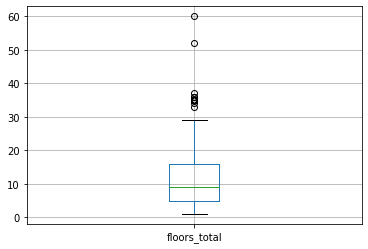

In [150]:
data.boxplot(column='floors_total')

Метод `describe()` показывает, что есть выбросы данных. Есть дома с этажностью 1, что вряд ли возможно. Видно, что есть редкие данные, которые не входят в основной объем данных. Так как такие данные не показательные для исследования, их можно откинуть.

#### Изучим столбец `last_price` на предмет аномалий, пропусков и т.д.

In [151]:
data.last_price.describe()

count    2.369900e+04
mean     6.541549e+06
std      1.088701e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64

<AxesSubplot:>

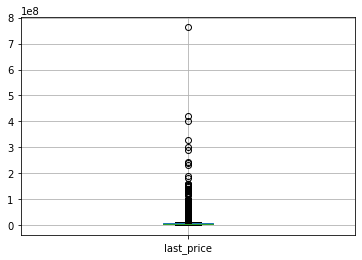

In [152]:
data.boxplot(column='last_price')

In [153]:
data[data['last_price'] > 15000000]['last_price'].count()

1204

В данном столбце находятся большие цифры, именно поэтому на гистограмме видно, что данные расположились возле единицы. Но в столбце есть аномальные значения. Основной объем значений лежит в области до 15 млн за квартиру. Квартир с ценой более 15 миллонов 721 штука. Можно откинуть данные аномальные выбросы.

#### Изучим столбец `ceiling_height` на предмет аномалий, пропусков и т.д.

In [154]:
data['ceiling_height'].describe()

count    14504.000000
mean         2.771499
std          1.261056
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

<AxesSubplot:>

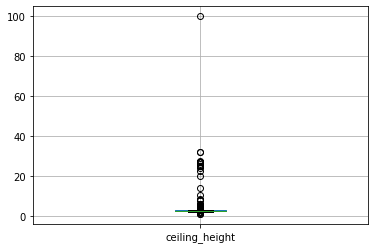

In [155]:
data.boxplot(column='ceiling_height')

In [156]:
data.loc[data['ceiling_height'] > 5, 'ceiling_height'].count()

36

По полученным данным видно, что есть квартиры с высотой потолка 10-100м. Видимо, есть ошибки при занесении данных в таблицу. Таких данных немного и мы можем их откинуть.

#### Изучим столбец `locality_name` на предмет аномалий, пропусков и т.д.

In [157]:
data['locality_name'].unique()


array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

Из полученных уникальных значений столбца `locality_name` видно, что в названиях есть определение типа поселения. Необходимо избавиться от всех типов поселений для исключения неявных дубликатов. Так же стоит обработать имена с буквой ё в названии и заменить все буквы ё на е, чтобы в на последующих этапах исследования не возникло проблем.

#### Изучим столбец `total_area` на предмет аномалий, пропусков и т.д.

In [158]:
data.total_area.describe()

count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64

<AxesSubplot:>

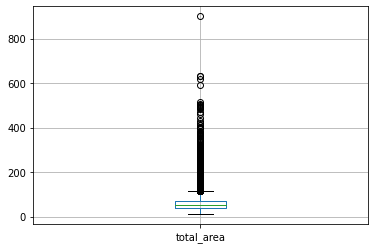

In [159]:
data.boxplot(column='total_area')

In [160]:
data.loc[data['total_area'] > 150, 'total_area'].count()

564

Увидим, что данные в основном лежат в значениях до 150м2. Посчитаем сколько квартир более 150м2 есть в датафрейме и получим цифру 564. Данных достаточно много, но они не сильно влияют на результаты исследования. Можно их откинуть.

#### Изучим столбец `living_area` на предмет аномалий, пропусков и т.д.

In [161]:
data.living_area.describe()

count    21796.000000
mean        34.457852
std         22.030445
min          2.000000
25%         18.600000
50%         30.000000
75%         42.300000
max        409.700000
Name: living_area, dtype: float64

<AxesSubplot:>

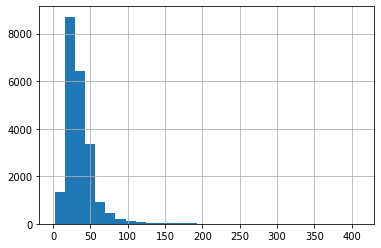

In [162]:
data.living_area.hist(bins=30)

В столбце есть пропуски в значениях. Данные пропуски можно заполнить по коэффициенту между разницей общей площади и кухни. В данных есть аномальные выбросы. Вряд ли жилая площадь может быть 2м2. Необходимо обработать эти выбросы и заполнить пропущенные значения медианой по коэффициенту от общей площади.

#### Изучим столбец `floors_total` на предмет аномалий, пропусков и т.д.

In [163]:
data['floors_total'].describe()

count    23613.000000
mean        10.673824
std          6.597173
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

<AxesSubplot:>

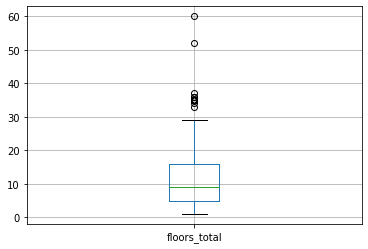

In [164]:
data.boxplot(column='floors_total')

Как мы видим из представленных данных, есть значения, которые сильно выбиваются из ожидаемых. Таких значений немного и их можно откинуть.

#### Изучим данные в столбцах  `airports_nearest`, `city_centers_nearest`, `parks_around3000`, `parks_nearest`, `ponds_around3000`, `ponds_nearest` на предмет аномалий, пропусков и т.д.

В данных столбцах есть множество незаполненных данных. По-всей видимости, это ошибка автоматической картографичской системы. Так как невозможно определить эти расстояния на основании аналогичных данных в таблице из-за того, что нам не известны конкретные адреса, то можно их заполнить значениями 0.

#### Вывод

Присланные данные представляют собой датафрейм из информации из объявлений на сайте Яндекс.Недвижимость. В датафрейм входят следующие столбцы:  
  
`airports_nearest` — расстояние до ближайшего аэропорта в метрах (м)  
`balcony` — число балконов  
`ceiling_height` — высота потолков (м)  
`cityCenters_nearest` — расстояние до центра города (м)  
`days_exposition` — сколько дней было размещено объявление (от публикации до снятия)  
`first_day_exposition` — дата публикации  
`floor` — этаж  
`floors_total` — всего этажей в доме  
`is_apartment` — апартаменты (булев тип)  
`kitchen_area` — площадь кухни в квадратных метрах (м²)  
`last_price` — цена на момент снятия с публикации  
`living_area` — жилая площадь в квадратных метрах (м²)  
`locality_name` — название населённого пункта  
`open_plan` — свободная планировка (булев тип)  
`parks_around3000` — число парков в радиусе 3 км  
`parks_nearest` — расстояние до ближайшего парка (м)  
`ponds_around3000` — число водоёмов в радиусе 3 км  
`ponds_nearest` — расстояние до ближайшего водоёма (м)  
`rooms` — число комнат  
`studio` — квартира-студия (булев тип)  
`total_area` — общая площадь квартиры в квадратных метрах (м²)  
`total_images` — число фотографий квартиры в объявлении  
  
В данных имеются множественные пропуски и аномальные значения. Для дальнейшей работы необходимо провести предобработку данных. В том числе, удаление явных и неявных дубликатов, приведение типов данных, приведение данных к нормализованным.

### Предобработка данных

#### Приведем данные в столбце `first_day_exposition` к типу `datetime`.

In [165]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S') 
#переведем в формат datetime

data.head(10) 
#проверим как заполнились данные

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


Так как в данных все время указано как нулевые значения, то остались только даты.

#### Заменим данные в столбце `is_apartment` на `False` для всех `NaN`.

In [166]:
data['is_apartment'] = data['is_apartment'].fillna(False) 
#заменим пропуски в столбце на значения False

data['is_apartment'].isna().sum() 
#проверим остались ли незаполненные значения

0

#### Заполним данные в столбце `days_exposition`.

In [167]:
last_exposition = data.first_day_exposition.max() + pd.Timedelta(days=1) 
#найдем последнюю дату публикации, прибавим день и сохраним в переменную last_exposition

data.loc[data['days_exposition'].isna() == True, 'days_exposition'] = (last_exposition - data['first_day_exposition']).dt.days
#заменим пропуски в столбце значениями от даты публикации до даты last_exposition

data.days_exposition.isna().sum()
#проверим, что пропуски заполнились


0

#### Заменим пропуски данных в столбце `kitchen_area` на средние по коэффициенту от площади.

In [168]:
data['kitchen_area'] = data['kitchen_area'].fillna(data.total_area * (data.kitchen_area.sum() / data.total_area.sum()))
#заменим пропуски на высчитанную по коэффициенту площадь кухни от всей площади квартиры

data['kitchen_area'].isna().sum()
#убедимся, что пропусков не осталось

0

#### Заполним пропущенные данные в столбце `ceiling_height` .

In [169]:
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median())
#заменим пропуски в столбце медианным значением по высотам потолков

data.ceiling_height.isna().sum()
#проверим, что все пропуски заполнились

0

#### Заменим аномальные значения в столбце `ceiling_height` на нормализованные.

In [170]:
data = data.loc[data['ceiling_height'] > 2]
#отбросим объявления, где указаны явно нереальные высоты потолков

ceiling_height_q25 = data['ceiling_height'].quantile(0.25)
ceiling_height_q75 = data['ceiling_height'].quantile(0.75)
ceiling_height_iqr = ceiling_height_q75 - ceiling_height_q25
ceiling_height_right = ceiling_height_q75 + ceiling_height_iqr * 1.5
#высчитаем верхнюю границу нормализованных данных

data['ceiling_height'].clip(upper=ceiling_height_right, inplace=True)
#заменим данные в таблице по верхней границе на высчитанную границу нормализованных данных

data.query('ceiling_height > @ceiling_height_right')['ceiling_height'].sum()
#проверим, что данных больше ceiling_height_right в столбце не осталось

0.0

#### Переименуем стобец `cityCenters_nearest`.

In [171]:
data = data.rename(columns={'cityCenters_nearest':'city_centers_nearest'})

data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,False,...,25.00000,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,58.0
1,7,3350000.0,40.4,2018-12-04,1,2.65,11.0,18.6,1,False,...,11.00000,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20,2,2.65,5.0,34.3,4,False,...,8.30000,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24,3,2.65,14.0,NaN,9,False,...,25.17134,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19,2,2.85,14.0,32.0,13,False,...,41.00000,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


#### Обработаем пропуски в столбце `living_area`.

In [172]:
data['living_area'] = data['living_area'].fillna((data.total_area - data.kitchen_area)* \
                                                 ((data.total_area.sum() - data.kitchen_area.sum())/data.total_area.sum()))
#заменим пропуски на высчитанную по коэффициенту от разницы между общей площадью и площадью кухни цифру

data['living_area'].isna().sum()
#убедимся, что пропусков не осталось

0

#### Удалим строки с аномальными значениями в столбце `floors_total`.

In [173]:
data = data.loc[(data['floors_total']<30) & (data['floors_total']>1)]
#удалим объеявления с этажностью домов более 30-и этажей и менее 1

data = data.reset_index(drop=True)
#обновим индексы

data.head()
#проверим, что все впордяке

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.000000,8,False,...,25.00000,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,58.0
1,7,3350000.0,40.4,2018-12-04,1,2.65,11.0,18.600000,1,False,...,11.00000,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20,2,2.65,5.0,34.300000,4,False,...,8.30000,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24,3,2.65,14.0,110.733096,9,False,...,25.17134,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19,2,2.85,14.0,32.000000,13,False,...,41.00000,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


#### Заполним пропущенные данные в столбце `balcony`.

In [174]:
data.balcony = data.balcony.fillna(value=0) 
#заменим пропуски значением 0

data.balcony.isna().sum() 
#убедимся, что пропусков не осталось

0

#### Избавимся от неявных дубликатов в столбце `locality_name` .

In [175]:
data['locality_name'] = data['locality_name'].fillna('unknown')
#заменим пропуски в данных на unknown

location_type = ['поселок при железнодорожной станции ', 'при железнодорожной станции ',
                 'коттеджный поселок ', 'поселок городского типа имени ',
                 'садоводческое некоммерческое товарищество ', 'садовое товарищество ',
                 'поселок городского типа ', 'городской поселок ', 'поселок имени ',
                 'поселок станции ', 'деревня имени ', 'село имени', 'деревня ',
                 'поселок ', 'село ', 'имени ']
#сделаем список значений для типов поселений

def location_type_delete (name):
    if name.find('ё') != -1:
        name = name.replace('ё', 'е')
          
    for item in location_type:
        if item in name:
            name = name.replace(item, '')
            return name
    return name
#напишем функцию для удаления типов поселений из стобца locality_name и замены букв ё в названии на е
    
data['locality_name'] = data['locality_name'].apply(location_type_delete)
#применим функцию ко всем значениям столбца

data['locality_name'].unique()
#проверим, как изменились названия поселений

array(['Санкт-Петербург', 'Шушары', 'Янино-1', 'Парголово', 'Мурино',
       'Ломоносов', 'Сертолово', 'Петергоф', 'Пушкин', 'Кудрово',
       'Коммунар', 'Колпино', 'Красный Бор', 'Гатчина', 'Федоровское',
       'Выборг', 'Кронштадт', 'Кировск', 'Новое Девяткино',
       'Металлострой', 'Лебяжье', 'Сиверский', 'Молодцово',
       'Кузьмоловский', 'Новая Ропша', 'Павловск', 'Пикколово',
       'Всеволожск', 'Волхов', 'Кингисепп', 'Приозерск', 'Сестрорецк',
       'Куттузи', 'Аннино', 'Ефимовский', 'Плодовое', 'Заклинье',
       'Торковичи', 'Первомайское', 'Красное Село', 'Понтонный',
       'Сясьстрой', 'Старая', 'Лесколово', 'Новый Свет', 'Сланцы',
       'Путилово', 'Ивангород', 'Шлиссельбург', 'Никольское',
       'Зеленогорск', 'Сосновый Бор', 'Оржицы', 'Кальтино', 'Романовка',
       'Бугры', 'Рощино', 'Кириши', 'Луга', 'Волосово', 'Отрадное',
       'Павлово', 'Оредеж', 'Копорье', 'Молодежное', 'Тихвин', 'Победа',
       'Нурма', 'Синявино', 'Тосно', 'Стрельна', 'Бокситогорск',

#### Заменим аномальные значения в столбце `living_area`.

In [176]:
living_area_coef = data['living_area'].sum() / data['total_area'].sum()
#высчитаем коэффициент для расчета жилой площади от общей площади квартиры

data.loc[data['living_area'] < 10, 'living_area'] = data.total_area * living_area_coef
#заменим пропуски на высчитанную по коэффициенту площадь кухни от всей площади квартиры

data.living_area.min()
#проверим, что аномальные жилые площади были обработаны

7.5856652146202155

#### Удалим данные с аномальными значениями в столбце `last_price`.

In [177]:
data = data.loc[data['last_price'] <= 15000000]
#удалим квартиры с ценами более 15млн.

data = data.reset_index(drop=True)
#обновим индексы

data['last_price'].max()
#проверим данные в таблице

15000000.0

#### Обработаем пропуски в столбцах `airports_nearest`, `city_center_nearest`, `parks_around3000`, `parks_nearest`, `ponds_around3000`, `ponds_nearest`.

In [178]:
columns_for_change = ['airports_nearest', 'parks_around3000', 'parks_nearest',\
                      'ponds_around3000', 'ponds_nearest', 'city_centers_nearest']
#создадим список наименований столбцов

for column in columns_for_change:
    data[column] = data[column].fillna(0)
#создадим цикл для замены всех значений во всех столбцах на 0

data.isna().sum()
#проверим, что в таблице больше не осталось незаполненных данных

total_images            0
last_price              0
total_area              0
first_day_exposition    0
rooms                   0
ceiling_height          0
floors_total            0
living_area             0
floor                   0
is_apartment            0
studio                  0
open_plan               0
kitchen_area            0
balcony                 0
locality_name           0
airports_nearest        0
city_centers_nearest    0
parks_around3000        0
parks_nearest           0
ponds_around3000        0
ponds_nearest           0
days_exposition         0
dtype: int64

#### Удалим аномальные данные в столбце `total_area`.

In [179]:
data = data.loc[data['total_area'] <= 150]
#удалим квартиры с площадью более 150м2

data = data.reset_index(drop=True)
#обновим индексы

data.info()
#проверим данные в таблице

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22259 entries, 0 to 22258
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          22259 non-null  int64         
 1   last_price            22259 non-null  float64       
 2   total_area            22259 non-null  float64       
 3   first_day_exposition  22259 non-null  datetime64[ns]
 4   rooms                 22259 non-null  int64         
 5   ceiling_height        22259 non-null  float64       
 6   floors_total          22259 non-null  float64       
 7   living_area           22259 non-null  float64       
 8   floor                 22259 non-null  int64         
 9   is_apartment          22259 non-null  bool          
 10  studio                22259 non-null  bool          
 11  open_plan             22259 non-null  bool          
 12  kitchen_area          22259 non-null  float64       
 13  balcony         

#### Избавимся от явных дубликатов если такие есть.

In [180]:
data = data.drop_duplicates()
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22259 entries, 0 to 22258
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          22259 non-null  int64         
 1   last_price            22259 non-null  float64       
 2   total_area            22259 non-null  float64       
 3   first_day_exposition  22259 non-null  datetime64[ns]
 4   rooms                 22259 non-null  int64         
 5   ceiling_height        22259 non-null  float64       
 6   floors_total          22259 non-null  float64       
 7   living_area           22259 non-null  float64       
 8   floor                 22259 non-null  int64         
 9   is_apartment          22259 non-null  bool          
 10  studio                22259 non-null  bool          
 11  open_plan             22259 non-null  bool          
 12  kitchen_area          22259 non-null  float64       
 13  balcony         

#### Приведем данные в столбцах   `rooms`,  `floor`, `floors_total`, `balcony`, `days_exposition`, `parks_around3000`, `ponds_around3000`   к целочисленному.

In [181]:
columns_to_change_type = ['rooms', 'floors_total', 'balcony', 'days_exposition', 'parks_around3000', 'ponds_around3000']
#создадим список наименований столбцов, в которых необходимо провести преобразования

for column in columns_to_change_type:
    data[column] = data[column].astype('int32')
#приведем все данные в столбцах к целочисленным значениям

data.info()
#проверим, что все впорядке

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22259 entries, 0 to 22258
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          22259 non-null  int64         
 1   last_price            22259 non-null  float64       
 2   total_area            22259 non-null  float64       
 3   first_day_exposition  22259 non-null  datetime64[ns]
 4   rooms                 22259 non-null  int64         
 5   ceiling_height        22259 non-null  float64       
 6   floors_total          22259 non-null  int32         
 7   living_area           22259 non-null  float64       
 8   floor                 22259 non-null  int64         
 9   is_apartment          22259 non-null  bool          
 10  studio                22259 non-null  bool          
 11  open_plan             22259 non-null  bool          
 12  kitchen_area          22259 non-null  float64       
 13  balcony         

#### Вывод

Пропуски в данных обработаны и заполнены. Обнаружены ошибки в заполнении данных как технические так и человеческого характера. 
Данные заполнялись на основаниий медианных значений, на основаниий коэффициентов, методом IQR и другие.

Сравним данные из первоначального датафрейма и полученного в ходе предобработки данных

In [182]:
data.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22259 entries, 0 to 22258
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          22259 non-null  int64         
 1   last_price            22259 non-null  float64       
 2   total_area            22259 non-null  float64       
 3   first_day_exposition  22259 non-null  datetime64[ns]
 4   rooms                 22259 non-null  int64         
 5   ceiling_height        22259 non-null  float64       
 6   floors_total          22259 non-null  int32         
 7   living_area           22259 non-null  float64       
 8   floor                 22259 non-null  int64         
 9   is_apartment          22259 non-null  bool          
 10  studio                22259 non-null  bool          
 11  open_plan             22259 non-null  bool          
 12  kitchen_area          22259 non-null  float64       
 13  balcony         

Количество данных уменьшилось примерно на 6%. Мы избавились от пропусков. Типы данных в столбцах приведены к соответствующим хранящимся в них данным.

### Добавление таблицу новых столбцов для исследования

Для дальнейшего исследования нам необходимо будет добавить новые столбцы в датафрейм. Новые столбцы будут в себя включать:  
- цена одного квадратного метра
- день публикации объявления (0 - понедельник, 1 - вторник и т.д.)
- месяц публикации объявления
- год публикации объявления
- тип этажа квартиры (значения — «первый», «последний», «другой»)
- расстояние в км до центра города  
- цена за квартиру в миллионах
  
Занесением данных в таблицу будет рассмотрено в этой главе.

#### Посчитаем стоимость квадратного метра для каждой квартиры и занесем в столбец `square_meters_price`.

In [183]:
data['square_meters_price'] = data['last_price'] / data['total_area']
#добавим новый столбец и занесем данные из цены объекта разделенного на всю площадь

data.head()
#посмотрим, что все впорядке

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,square_meters_price
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,0,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,58,120370.370370
1,7,3350000.0,40.4,2018-12-04,1,2.65,11,18.6,1,False,...,2,Шушары,12817.0,18603.0,0,0.0,0,0.0,81,82920.792079
2,10,5196000.0,56.0,2015-08-20,2,2.65,5,34.3,4,False,...,0,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558,92785.714286
3,2,10000000.0,100.0,2018-06-19,2,2.85,14,32.0,13,False,...,0,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121,100000.000000
4,10,2890000.0,30.4,2018-09-10,1,2.65,12,14.4,5,False,...,0,Янино-1,0.0,0.0,0,0.0,0,0.0,55,95065.789474


#### Создадим новый столбец `exposition_week_day`, куда занесем день недели публикации объявления.

In [184]:
data['exposition_week_day'] = data['first_day_exposition'].dt.weekday
#добавим новый столбец, куда занесем день недели

data.head()
#проверим, что все впорядке

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,locality_name,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,square_meters_price,exposition_week_day
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,Санкт-Петербург,18863.0,16028.0,1,482.0,2,755.0,58,120370.370370,3
1,7,3350000.0,40.4,2018-12-04,1,2.65,11,18.6,1,False,...,Шушары,12817.0,18603.0,0,0.0,0,0.0,81,82920.792079,1
2,10,5196000.0,56.0,2015-08-20,2,2.65,5,34.3,4,False,...,Санкт-Петербург,21741.0,13933.0,1,90.0,2,574.0,558,92785.714286,3
3,2,10000000.0,100.0,2018-06-19,2,2.85,14,32.0,13,False,...,Санкт-Петербург,31856.0,8098.0,2,112.0,1,48.0,121,100000.000000,1
4,10,2890000.0,30.4,2018-09-10,1,2.65,12,14.4,5,False,...,Янино-1,0.0,0.0,0,0.0,0,0.0,55,95065.789474,0


#### Создадим новый столбец `exposition_month`, куда занесем месяц публикации объявления.

In [185]:
data['exposition_month'] = data['first_day_exposition'].dt.month
#добавим новый столбец, куда занесем номер месяца

data.head()
#проверим, что все впорядке

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,airports_nearest,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,square_meters_price,exposition_week_day,exposition_month
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,18863.0,16028.0,1,482.0,2,755.0,58,120370.370370,3,3
1,7,3350000.0,40.4,2018-12-04,1,2.65,11,18.6,1,False,...,12817.0,18603.0,0,0.0,0,0.0,81,82920.792079,1,12
2,10,5196000.0,56.0,2015-08-20,2,2.65,5,34.3,4,False,...,21741.0,13933.0,1,90.0,2,574.0,558,92785.714286,3,8
3,2,10000000.0,100.0,2018-06-19,2,2.85,14,32.0,13,False,...,31856.0,8098.0,2,112.0,1,48.0,121,100000.000000,1,6
4,10,2890000.0,30.4,2018-09-10,1,2.65,12,14.4,5,False,...,0.0,0.0,0,0.0,0,0.0,55,95065.789474,0,9


#### Создадим новый столбец `exposition_year`, куда занесем год публикации объявления.

In [186]:
data['exposition_year'] = data['first_day_exposition'].dt.year
#добавим новый столбец, куда занесем год

data.head()
#проверим, что все впорядке

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,city_centers_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,square_meters_price,exposition_week_day,exposition_month,exposition_year
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,16028.0,1,482.0,2,755.0,58,120370.370370,3,3,2019
1,7,3350000.0,40.4,2018-12-04,1,2.65,11,18.6,1,False,...,18603.0,0,0.0,0,0.0,81,82920.792079,1,12,2018
2,10,5196000.0,56.0,2015-08-20,2,2.65,5,34.3,4,False,...,13933.0,1,90.0,2,574.0,558,92785.714286,3,8,2015
3,2,10000000.0,100.0,2018-06-19,2,2.85,14,32.0,13,False,...,8098.0,2,112.0,1,48.0,121,100000.000000,1,6,2018
4,10,2890000.0,30.4,2018-09-10,1,2.65,12,14.4,5,False,...,0.0,0,0.0,0,0.0,55,95065.789474,0,9,2018


#### Создадим новый столбец `floor_type` и занесем туда данные по этажу (первый, последний или другой).

In [187]:
def categorizer_for_floors (row):
    if row['floors_total'] == row['floor']:
        return 'последний'
    elif row['floor'] == 1:
        return 'первый'
    else:
        return 'другой'
#напишем функцию, которая будет присваивать катгорию в соответствии с данными из полученной строки
    
data['floor_type'] = data.apply(categorizer_for_floors, axis=1)
#передадим все строки в написанную функцию и добавим в новый столбец категории

data.head()
#проверим, что все впорядке

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,square_meters_price,exposition_week_day,exposition_month,exposition_year,floor_type
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,1,482.0,2,755.0,58,120370.370370,3,3,2019,другой
1,7,3350000.0,40.4,2018-12-04,1,2.65,11,18.6,1,False,...,0,0.0,0,0.0,81,82920.792079,1,12,2018,первый
2,10,5196000.0,56.0,2015-08-20,2,2.65,5,34.3,4,False,...,1,90.0,2,574.0,558,92785.714286,3,8,2015,другой
3,2,10000000.0,100.0,2018-06-19,2,2.85,14,32.0,13,False,...,2,112.0,1,48.0,121,100000.000000,1,6,2018,другой
4,10,2890000.0,30.4,2018-09-10,1,2.65,12,14.4,5,False,...,0,0.0,0,0.0,55,95065.789474,0,9,2018,другой


#### Добавим столбец `city_centers_nearest_in_km` с расстоянием до центра в километрах.

In [188]:
try:
    data['city_centers_nearest_in_km'] = data['city_centers_nearest'] / 1000
except:
    data['city_centers_nearest_in_km'] = data['city_centers_nearest']
#поделим значения в столбце 'city_center_nearest' на 1000 и запишем в столбец 'city_center_nearest_in_km'

data.head()
#проверим, что все впорядке

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,square_meters_price,exposition_week_day,exposition_month,exposition_year,floor_type,city_centers_nearest_in_km
0,20,13000000.0,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,482.0,2,755.0,58,120370.370370,3,3,2019,другой,16.028
1,7,3350000.0,40.4,2018-12-04,1,2.65,11,18.6,1,False,...,0.0,0,0.0,81,82920.792079,1,12,2018,первый,18.603
2,10,5196000.0,56.0,2015-08-20,2,2.65,5,34.3,4,False,...,90.0,2,574.0,558,92785.714286,3,8,2015,другой,13.933
3,2,10000000.0,100.0,2018-06-19,2,2.85,14,32.0,13,False,...,112.0,1,48.0,121,100000.000000,1,6,2018,другой,8.098
4,10,2890000.0,30.4,2018-09-10,1,2.65,12,14.4,5,False,...,0.0,0,0.0,55,95065.789474,0,9,2018,другой,0.000


#### Добавим новый столбец `last_price_in_mln`.

In [189]:
data['last_price_in_mln'] = data['last_price'] / 1000000
#добавим столбец и занесем туда данные по стоимости квартиры в миллионах
    
data['last_price_in_mln'].isna().sum()
#проверим, что все данные посчитались и пропущенных значений нет

0

#### Вывод

Для дальнейшего исследования были добавлены новые столбцы в датафрейм:  
  
`square_meters_price` - информация о стоимости квадратного метра жилья для всех квартир.  
`exposition_week_day` - день недели, когда было опубликовано объявление от продажи (0 - понедельник, 1 -вторник и т.д.).  
`exposition_month` - месяц, когда было опубликовано объявление о продаже.  
`exposition_year` - год, когда было опубликовано объявление о продаже.  
`floor_type` - тип этажа (первый, последний, другой).  
`city_centers_nearest_in_km` - расстояние до центра города в километрах.  
`last_price_in_mln` - цена за квартиру в миллионах.  
  
Все необходмие данные для исследования добавлены. Можно приступать.


### Исследовательский анализ данных

В части исследовательского анализа необходимо изучить предоставленные данные для понимания формирования цены на объекты.  
Исследование будет разбито на несколько частей:
1. Исследование данных в столбцах и описание этих данных.
2. Исследование влияния стоимости квартир в зависимости от различных факторов.
3. Найдем поселения с самым дешевым и дорогим квадратным метром.
4. Найдем влияние стоимости объекта недвижимости при удалении от центра города Санкт-Петербург.

#### Исследование данных в столбцах и описание их значений.

1. Изучим данные в столбце `total_area`.

In [190]:
data.total_area.describe()

count    22259.000000
mean        54.732209
std         20.562122
min         12.000000
25%         39.400000
50%         50.000000
75%         65.500000
max        150.000000
Name: total_area, dtype: float64

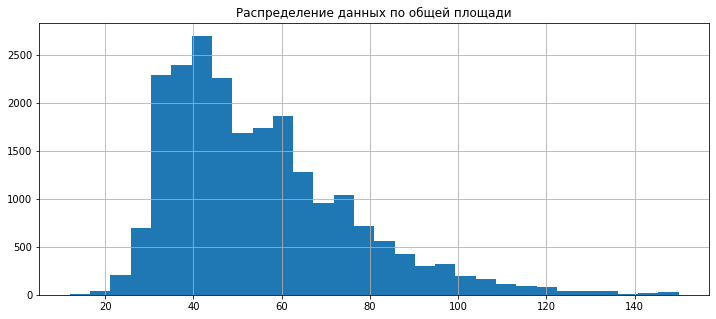

In [191]:
data.total_area.hist(bins=30, figsize=(12,5), grid=True)
plt.title('Распределение данных по общей площади')
plt.show()

Данные в столбце распределяются нормально. Большинство представленных квартир имеют площадь 50м2

2. Изчим данные в столбце `living_area`.

In [192]:
data.living_area.describe()

count    22259.000000
mean        31.913188
std         14.467013
min          7.585665
25%         18.800000
50%         30.000000
75%         41.000000
max        128.000000
Name: living_area, dtype: float64

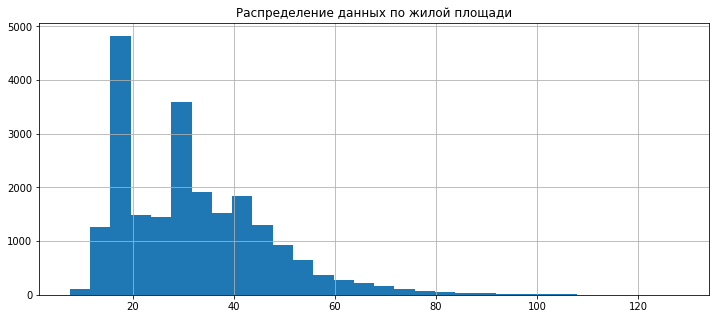

In [193]:
data.living_area.hist(bins=30, figsize=(12,5), grid=True)
plt.title('Распределение данных по жилой площади')
plt.show()

In [194]:
data.living_area.corr(data.total_area)

0.9169683886567345

Данные имеют выбросы в районе некоторых значений, но возможно это коррелирует с общей площадью квартиры. После проверки так и оказалось. Корелляция между этими факторами крайне высока, как и ожидалось. В датафрейме представлены квартиры с жилой площадью от 10 до 130м2.

3. Изучим данные в столбце `kitchen_area`.

In [195]:
data.kitchen_area.describe()

count    22259.000000
mean         9.659899
std          4.163323
min          1.300000
25%          7.000000
50%          9.000000
75%         11.000000
max         64.000000
Name: kitchen_area, dtype: float64

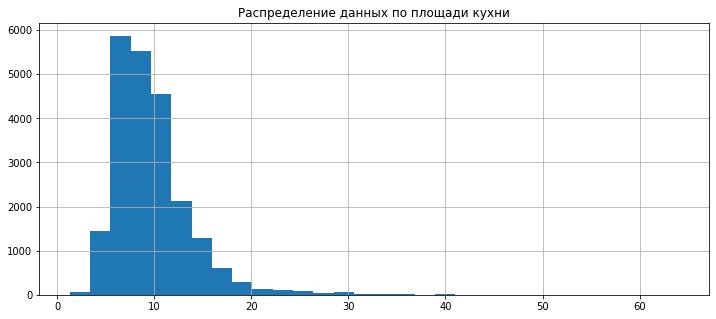

In [196]:
data.kitchen_area.hist(bins=30, figsize=(12,5), grid=True)
plt.title('Распределение данных по площади кухни')
plt.show()

In [197]:
data.kitchen_area.corr(data.total_area)

0.5214733818160753

Данные по площади кухни распределны согласно распределению Пуассона. Кухни имеют плоащади от 5 до 60м2. Так же можно убедиться, что данные имеют корреляцию с общей площадью квартиры.

4. Изучим данные в столбце `last_price_in_mln`.

In [198]:
data.last_price.describe()

count    2.225900e+04
mean     5.131346e+06
std      2.671869e+06
min      1.219000e+04
25%      3.350000e+06
50%      4.500000e+06
75%      6.286366e+06
max      1.500000e+07
Name: last_price, dtype: float64

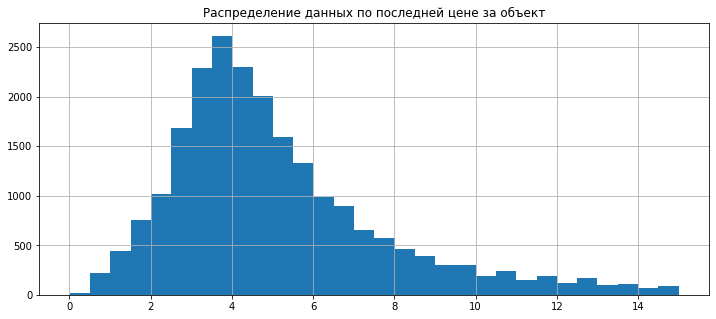

In [199]:
data.last_price_in_mln.hist(bins=30, figsize=(12,5), grid=True)
plt.title('Распределение данных по последней цене за объект')
plt.show()

Возьмем данные не из столбца `last_price`, а из столбца `last_price_in_mln`. Это необходимо так как числа в столбце `last_price` слишком большие и откидывается часть с нулями, то есть данные теряются.  
Данные распределны нормально и готовы для анализа. В среднем квартиры стоят около 4,5 миллионов.

5. Изучим данные в столбце `rooms`.

In [200]:
data.rooms.describe()

count    22259.000000
mean         1.967788
std          0.932580
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max          7.000000
Name: rooms, dtype: float64

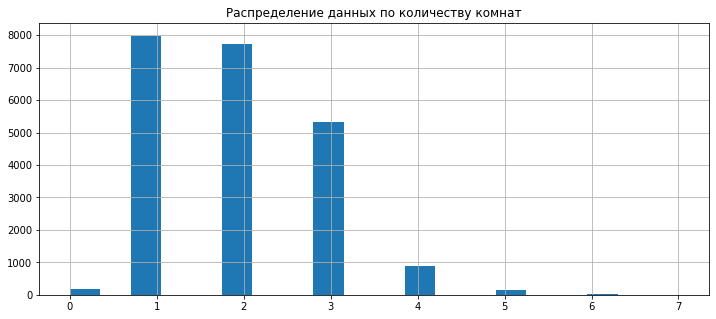

In [201]:
data.rooms.hist(bins=20, figsize=(12,5), grid=True)
plt.title('Распределение данных по количеству комнат')
plt.show()

Больше всего на рынке продаются однокомнатных квартир. По гистограмме видно, что так же имеется часть квартир с количеством комнат 0. Это может показаться странным, но на всамом деле это связано с тем, что данные квартиры являются студиями и имеют значение `True` в столбце `studio`.

6. Изучим данные в столбце `ceiling_height`.

In [202]:
data.ceiling_height.describe()

count    22259.000000
mean         2.651246
std          0.102240
min          2.200000
25%          2.600000
50%          2.650000
75%          2.700000
max          2.850000
Name: ceiling_height, dtype: float64

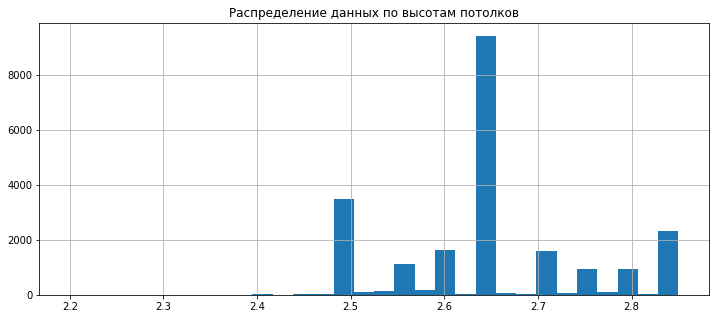

In [203]:
data.ceiling_height.hist(bins=30, figsize=(12,5), grid=True)
plt.title('Распределение данных по высотам потолков')
plt.show()

Данные распределны достаточно странно даже после нормализации. Видны пики в некоторых значениях. Это видимо связано с тем, что люди округляют высоту потолка до какой-то более простой цифры.

7. Изучим столбец `floor`.

In [204]:
data['floor'].describe()

count    22259.000000
mean         5.874523
std          4.872876
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         27.000000
Name: floor, dtype: float64

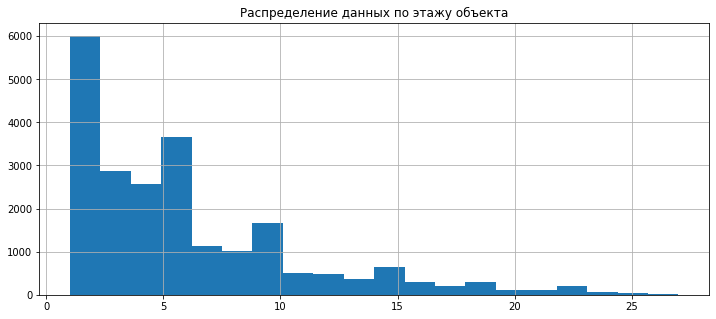

In [205]:
data['floor'].hist(bins=20, figsize=(12,5), grid=True)
plt.title('Распределение данных по этажу объекта')
plt.show()

В столбце представлены квартиры от 1-го до 27-го этажа. Видно, что большинство квартир располагаются на первом этаже. 

8. Изучим столбец `floor_type`.

In [206]:
data['floor_type'].describe()

count      22259
unique         3
top       другой
freq       16348
Name: floor_type, dtype: object

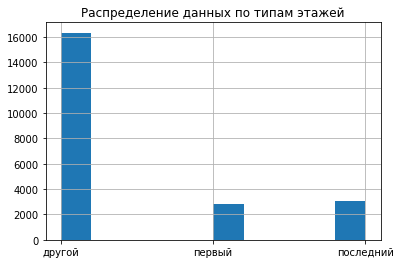

In [207]:
data['floor_type'].hist()
plt.title('Распределение данных по типам этажей')
plt.show()

Ожидаемо, что большинство квартир попадают в категории `другой`. Квартиры на первом и последнем этаже разделены примерно по-ровну.

9. Изучим столбец `floors_total`.

In [208]:
data['floors_total'].describe()

count    22259.000000
mean        10.746619
std          6.572163
min          2.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         29.000000
Name: floors_total, dtype: float64

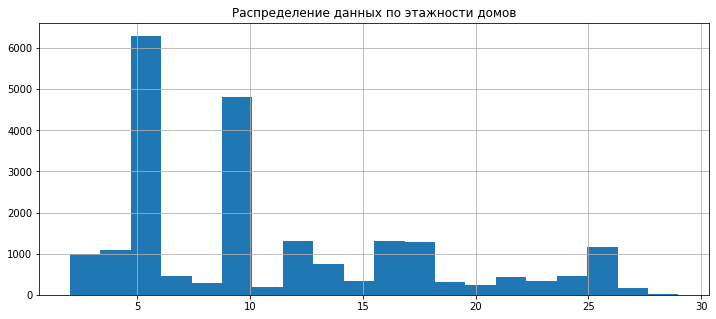

In [209]:
data['floors_total'].hist(bins=20, figsize=(12,5), grid=True)
plt.title('Распределение данных по этажности домов')
plt.show()

Дома имеют разную этажность и данные распределны равномерно. Видимо, пики в некоторых местах обусловлены самыми популярными этажностями домов. Например, 5, 9, 17 и т.д. Большинство объявлений представляют квартиры в домах с пятью этажами.

10. Изучим данные в столбце `city_centers_nearest`.

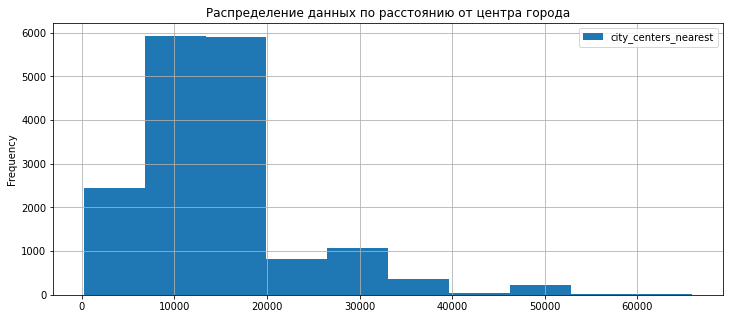

In [210]:
(
    data.query('city_centers_nearest !=0')
    .plot(y='city_centers_nearest', kind='hist', figsize=(12,5), grid=True)
)
plt.title('Распределение данных по расстоянию от центра города')
plt.show()

Гистограмма показывает большой пик возле 0. Это связано с тем, что в местах, где нам были недоступны данные о расстоянии до центра мы заменили значения нулями. Откинем эти данные для наглядности. В остальном, можно сказать, что данные распределены нормально. Есть хвост в сторону 60км от центра. Можно бы было убрать этот хвост, так как таких данных мало, но это может повлиять на остальные параметры. Большинство квартир расположены в 15км от центра города.

11. Изучим данные в столбце `airports_nearest`.

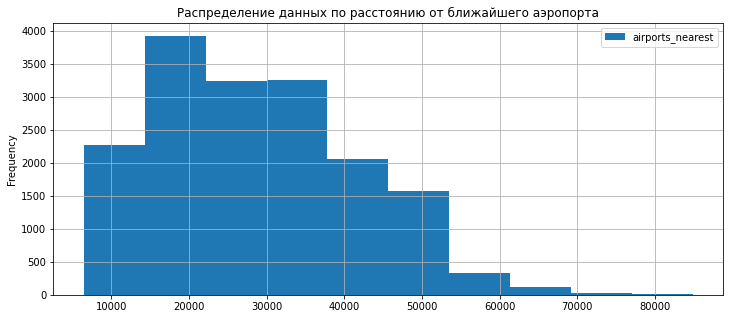

In [211]:
(
    data.query('airports_nearest !=0')
    .plot(y='airports_nearest', kind='hist', figsize=(12,5), grid=True)
)
plt.title('Распределение данных по расстоянию от ближайшего аэропорта')
plt.show()

Так же как и в ситуации с расстоянием до центра города, мы имеем пик в районе 0. Для наглядности откинем эти данные. В остальном можно увидеть, что большинство объявлений представляют квартиры в районе 20км от ближайшего аэропорта.

12. Изучим столбец `parks_nearest`.

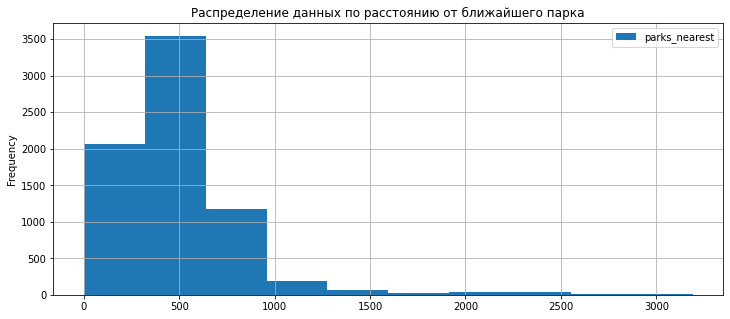

In [212]:
(
    data.query('parks_nearest !=0')
    .plot(y='parks_nearest', kind='hist', figsize=(12,5), grid=True)
)
plt.title('Распределение данных по расстоянию от ближайшего парка')
plt.show()

Откинем данные со значениями 0 для наглядности. Большинство квартир из объявлений имеют парк в районе 500 метров от дома.

13. Изучим данные в столбцах `exposition_week_day` и `expostion_month`.

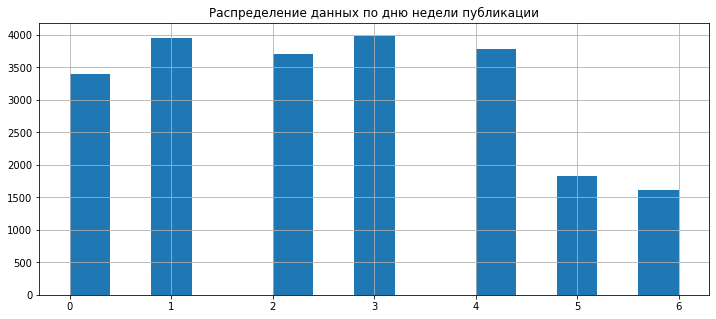

In [213]:
data['exposition_week_day'].hist(bins=15, figsize=(12,5))
plt.title('Распределение данных по дню недели публикации')
plt.show()

Большинство объявлений публикуется в будние дни. Из будних дней чаще всего публикуются в четверг.

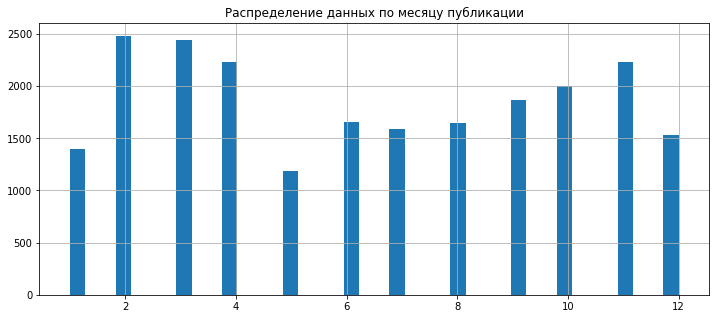

In [214]:
data['exposition_month'].hist(bins=40, figsize=(12,5))
plt.title('Распределение данных по месяцу публикации')
plt.show()

Как мы видим, большинство объявлений публикуется в феврале, марте и декабре, а меньше всего в январе и мае. По всей видимости, это связано с длинными праздниками в этих месяцах.

#### Исследуем факторы, влияющие на стоимость квартир

1. Исследуем на сколько быстро продаются квартиры. Для этого изучим столбец `days_exposition`.

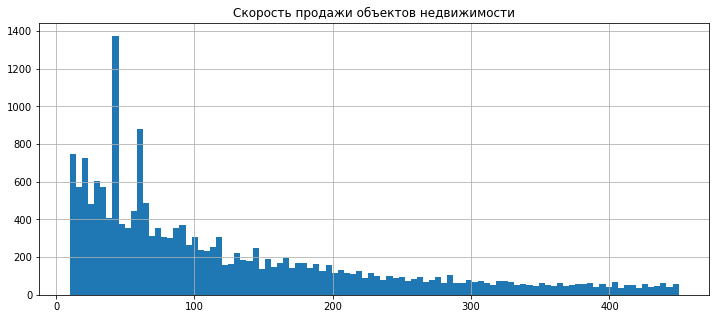

In [215]:
data['days_exposition'].hist(bins=100, range=[10,450], figsize=(12,5))
plt.title('Скорость продажи объектов недвижимости')
plt.show()

In [216]:
data['days_exposition'].describe()

count    22259.000000
mean       178.099196
std        222.905454
min          1.000000
25%         42.000000
50%         91.000000
75%        226.000000
max       1619.000000
Name: days_exposition, dtype: float64

<AxesSubplot:>

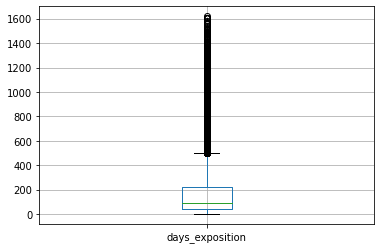

In [217]:
data.boxplot('days_exposition')

In [218]:
data.query('days_exposition > 450')['days_exposition'].count()

2257

В средним объявления снимаются с публикации в течении 91-го дня или 3 месяца. Это относительно не долго для продажи квартиры.  
Если посмотреть методом describe(), то видно, что среднее арифметическое сильно отличается от медианы и стандартное отклонение велико. Это говорит о выбросах. Видно, что есть выбросы в публикациях, которые висели очень недолго, до 10 дней. Так же есть длинный "хвост" данных по публикациям, которые висели более 450 дней. Таких объявлений 2257. Построим гистограмму откинув эти значения, чтобы лучше разглядеть другие выбросы.

2. Посмотрим как влияют различные факторы на ценообразование квартир (в качестве стоимости для наглядности возьмем данные столбца `last_price_in_mln`).

Посмотрим зависимость стоимости квартиры от общей площади и корреляцию этих факторов.

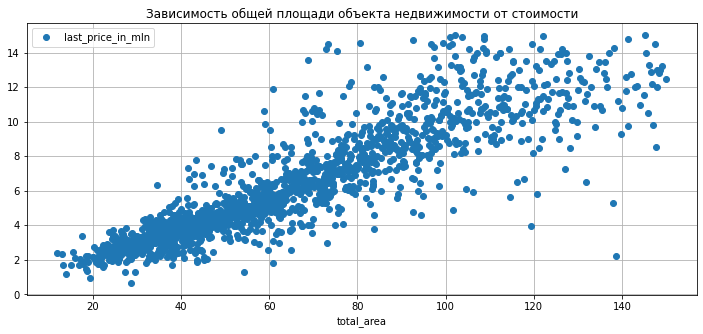

In [230]:
(
    data.pivot_table(index='total_area', values='last_price_in_mln', aggfunc='mean')
    .plot(grid=True, figsize=(12, 5), style='o')
)
plt.title('Зависимость общей площади объекта недвижимости от стоимости')
plt.show()

Как и ожидалось, с возрастанием общей площади квартиры растет и ее стоимость. Так же на этом графике отчетливо видно, что эти 2 фактора сильно коррелируют между собой.

Посмотрим зависимость стоимости квартиры от жилой площади и корреляцию этих факторов.

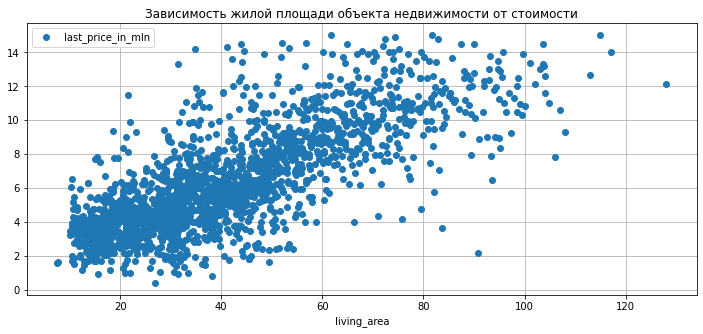

In [220]:
(
    data.pivot_table(index='living_area', values='last_price_in_mln', aggfunc='mean')
    .plot(grid=True, figsize=(12, 5), style='o')
)
plt.title('Зависимость жилой площади объекта недвижимости от стоимости')
plt.show()

Так же как и в предыдущем случае, при увеличении жилой площади квартиры растет и стоимость квартиры и эти данные так же хорошо между собой коррелируют.

Посмотрим зависимость стоимости квартиры от площади кухни и корреляцию этих факторов.

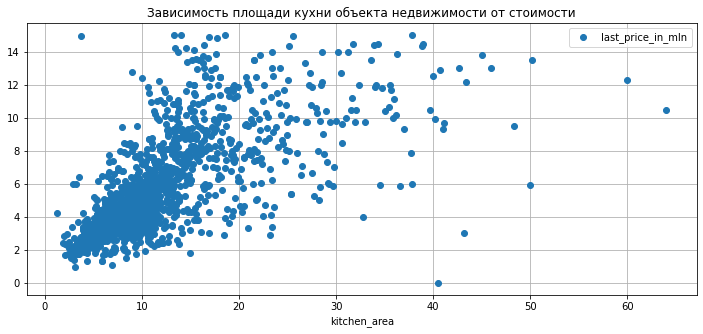

In [221]:
(
    data.pivot_table(index='kitchen_area', values='last_price_in_mln', aggfunc='mean')
    .plot(grid=True, figsize=(12, 5), style='o')
)
plt.title('Зависимость площади кухни объекта недвижимости от стоимости')
plt.show()

В этом случае корреляция также есть. Так же на графики видны некоторые выбивающиеся значения.

Посмотрим, влияют ли количество комнат в квартире на стоимость.

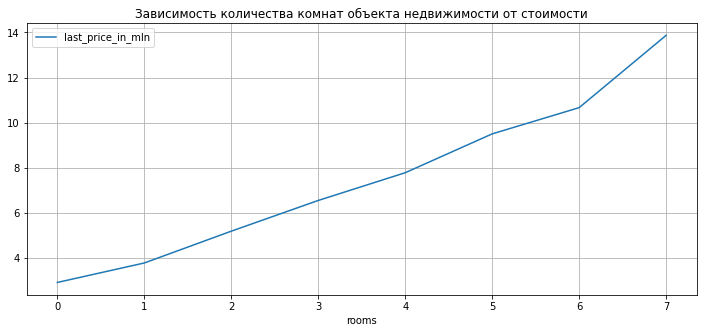

In [231]:
(
    data.pivot_table(index='rooms', values='last_price_in_mln', aggfunc='mean')
    .plot(grid=True, figsize=(12, 5))
)
plt.title('Зависимость количества комнат объекта недвижимости от стоимости')
plt.show()

Здесь данные сложились в линию. Это говорит о том, что зависимость этих двух факторов прямая.

Посмотрим, влияет ли категория этажа на стоимость квартир.

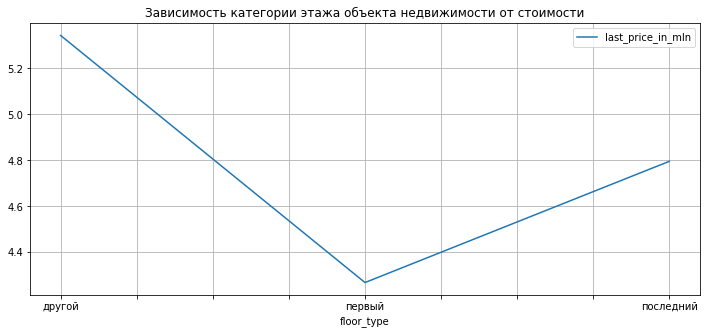

In [232]:
(
    data.pivot_table(index='floor_type', values='last_price_in_mln', aggfunc='mean')
    .plot(grid=True, figsize=(12, 5))
)
plt.title('Зависимость категории этажа объекта недвижимости от стоимости')
plt.show()

In [224]:
data.pivot_table(index='floor_type', values='last_price_in_mln', aggfunc=['median', 'count']).corr()

,,median,count
,,last_price_in_mln,last_price_in_mln
median,last_price_in_mln,1.000000,0.949292
count,last_price_in_mln,0.949292,1.000000


Видно, что эти факторы сильно зависимы. Самые дорогие квартиры находятся ни на первом, ни на последнем этажах.

Посмотрим, зависит ли цена от того, в какой день недели разместили объявление.

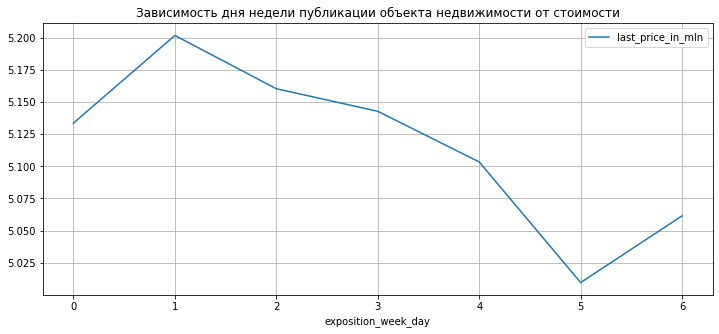

In [235]:
(
    data.pivot_table(index='exposition_week_day', values='last_price_in_mln', aggfunc='mean')
    .plot(grid=True, figsize=(12, 5))
)
plt.title('Зависимость дня недели публикации объекта недвижимости от стоимости')
plt.show()

Согласно графика, дорогие квартиры публикуют во вторник, а самые дешевые к концу недели и на выходных.

Посмотрим, зависит ли месяц публикации и стоимость квартир.

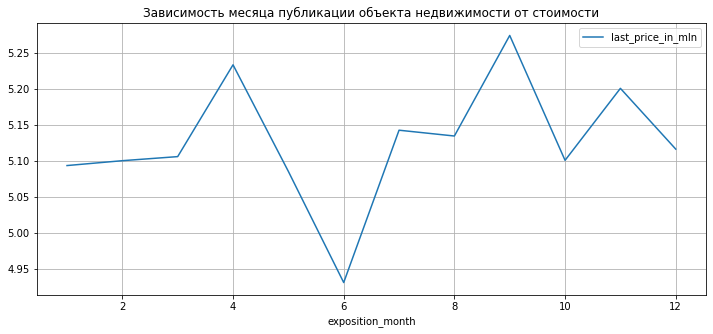

In [236]:
(
    data.pivot_table(index='exposition_month', values='last_price_in_mln', aggfunc='mean')
    .plot(grid=True, figsize=(12, 5))
)
plt.title('Зависимость месяца публикации объекта недвижимости от стоимости')
plt.show()

Самые дешевые квартиры публикуют в июне, а вот самые дорогие в сентябре.

Посмотрим, как менялась цена на квартиры с 2014 по 2019-ый годы.

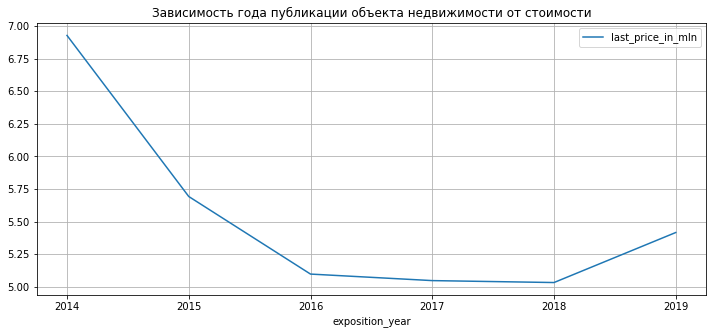

In [237]:
(
    data.pivot_table(index='exposition_year', values='last_price_in_mln', aggfunc='mean')
    .plot(grid=True, figsize=(12, 5))
)
plt.title('Зависимость года публикации объекта недвижимости от стоимости')
plt.show()

Видно, что с 2014 года квартиры дешевели, но в 2016-ом снижение стоимости остановилось и с 2017-го квартиры стали дорожать.

#### Найдем поселения с самым дешевым и дорогим квадратным метром.

Для исследования мы возьмем 10 поселений, из которых было опубликовано наибольшее количество объявлений.

In [228]:
data_location_square_meters = data.pivot_table(index='locality_name', values='square_meters_price', aggfunc='median')
#создадим новую переменную для отсортированных данных по стоимости квадратного метра в поселениях

data_location_expositions = (data
                             .pivot_table(index='locality_name', values='first_day_exposition', aggfunc='count')
                             .sort_values(by='first_day_exposition', ascending=False)
                            )
#создадим новую переменную для отсортированных данных по количеству объявлений из поселений и отсортируем по убыванию

data_final = (
    data_location_square_meters
    .join(data_location_expositions[:9], on='locality_name', how='right')
    .sort_values(by='square_meters_price', ascending=False)
)
#создадим новую переменную, в которой объединим ранее созданные таблицы

data_final

,square_meters_price,first_day_exposition
locality_name,,
Санкт-Петербург,102949.155788,14386
Пушкин,99431.818182,351
Кудрово,95588.235294,469
Парголово,91780.224134,326
Мурино,86250.377687,586
Шушары,76829.268293,439
Колпино,74722.222222,337
Гатчина,67796.610169,307
Всеволожск,65789.473684,395


Из 10-ти пунктов с самым большим количеством объявлений самая большая стоимость за квадратный метр в Санкт-Петербурге, а самая низкая - в Выборге.

#### Найдем влияние стоимости объекта недвижимости при удалении от центра города Санкт-Петербург.

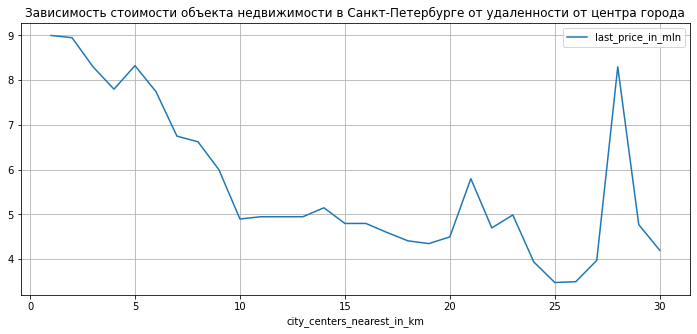

In [239]:
flats_spb = data.query('(locality_name == "Санкт-Петербург") & (city_centers_nearest_in_km != 0)')
#отсортируем данные, чтобы остались только квартиры из Санкт-Петербурга и с не нулевыми значениями расстояния до центра

flats_km_from_center_spb = (flats_spb
                            .loc[:,['city_centers_nearest_in_km', 'last_price_in_mln']]
                            .sort_values(by='city_centers_nearest_in_km', ascending=False)
                           )
#создадим новый датафрейм только с необходимыми данными

flats_km_from_center_spb['city_centers_nearest_in_km'] = flats_km_from_center_spb['city_centers_nearest_in_km'] + \
                                                         (1 - flats_km_from_center_spb['city_centers_nearest_in_km'] % 1)
#округлим значения в столбце с расстоянием в большую сторону

(
    flats_km_from_center_spb
    .pivot_table(index='city_centers_nearest_in_km', values='last_price_in_mln', aggfunc='median')
    .plot(y='last_price_in_mln', grid=True, figsize=(12, 5))
)
plt.title('Зависимость стоимости объекта недвижимости в Санкт-Петербурге от удаленности от центра города')
plt.show()
#выведем гистограмму по средним значениями стоимости километра

Как мы видим из графика, цена за квадратный метр с удалением от центра падает, но не равномерно. Явно виден пик в районе 46-го километра. Возможно, в этом месте расположился какой-то элитный район с высокими ценами за жилье.

#### Вывод

При проведении исследования было установлено:
- стоимость квартир зависит как от площади всей квартиры, так и от площади помещений внутри квартиры.
- большинство продаваемых квартир находятся ни на первом ни на последнем.
- в среднем квартиры продаются за 91 день. 
- меньше всего публикаций приходятся на май, декабрь и январь, а пик на июнь.
- больше всего продаваемых квартир расположены в пятиэтажных домах.
- средняя цена на квартиры - 4,5 млн.
- средняя площадь продаваемых квартир - 50м2.
- самая дорогая стоимость квадратного метра жилья в Санкт-Петербурге, а самая низкая в Выборге.
- цена за квадратный метр жилья в Санкт-Петербурге падает при удалении от центра города.

### Общий вывод

В рамках проведенного исследования на определение параметров рыночной стоимости жилья на основании датафрейма из сервиса Яндекс.Недвижимость было выполнено:
Главные этапы исследования будут включать:  
- Ознакомление с датафреймом и информацией внутри.
- Выполнение предобработки данных.
- Категоризацию данных.
- Исследовательский анализ данных.
- Общий вывод.
  
При получении датафрейма были выявлены пропуски в данных, аномальные значения и неявные дубликаты. Все значения были обработаны и приведены к нормализованным или удалены. При этом было исключено примерно 6% данных.  
  
В части самого исследования было выполнено: 
- Исследование данных в столбцах и описание этих данных.
- Исследование влияния стоимости квартир в зависимости от различных факторов.
- Найдены поселения с самым дешевым и дорогим квадратным метром.
- Найдено влияние стоимости объекта недвижимости при удалении от центра города Санкт-Петербург.  
  
По окончании исследования были сделаны следующие выводы:  
- стоимость квартир зависит как от площади всей квартиры, так и от площади помещений внутри квартиры.
- большинство продаваемых квартир находятся ни на первом ни на последнем.
- в среднем квартиры продаются за 91 день. 
- меньше всего публикаций приходятся на май, декабрь и январь, а пик на июнь.
- больше всего продаваемых квартир расположены в пятиэтажных домах.
- средняя цена на квартиры - 4,5 млн.
- средняя площадь продаваемых квартир - 50м2.
- самая дорогая стоимость квадратного метра жилья в Санкт-Петербурге, а самая низкая в Выборге.
- цена за квадратный метр жилья в Санкт-Петербурге падает при удалении от центра города.  
  
Стоимость квартир имеет тенденцию к возрастанию и дальше стоимость будет увеличиваться. Основной упор следует сделать на квартирах, которые продают в пятиэтажках, не на первом этаже и общей площадью 50м2. Тенденция к возрастанию цены зависит от места расположения объекта и площади.  
Во время исследования были выявлены проблемы с датафреймом, такие как:
- недостатки в работе автоматической системы распознования расстояний по снимкам со спутника. Рекомендуется доработать данную систему для более качественного распознавания.
- проблемы с выгрузкой данных из системы, из-за которой не верно определяется количество дней публикации. Рекомендуется проверить как данные выгружаются из системы и обратить внимание на публикации, которые все еще опубликованы.
- проблемы с занесением параметров по площади кухонь, высотам потолков, этажности зданий и количества балконов в таблицу. Рекомендуется проверять данные, вносимые пользователем и отсеивать явно неприемлимые варианты.
- проблемы с определением наименований городов и поселений. Рекомендуется стандартизировать и унифицировать заносимые наименования в таблицу, исключить разное написание населенных пунктов (например, убрать все буквы ё из названий).


**Чек-лист готовности проекта**

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод `info()`, гистограммы и т.д.)
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения там, где это возможно
- [x]  есть пояснение, какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение, в каких столбцах изменены типы и почему
- [x]  устранены неявные дубликаты в названиях населённых пунктов
- [x]  устранены редкие и выбивающиеся значения (аномалии) во всех столбцах
- [x]  посчитано и добавлено в таблицу: цена одного квадратного метра
- [x]  посчитано и добавлено в таблицу: день публикации объявления (0 - понедельник, 1 - вторник и т.д.)
- [x]  посчитано и добавлено в таблицу: месяц публикации объявления
- [x]  посчитано и добавлено в таблицу: год публикации объявления
- [x]  посчитано и добавлено в таблицу: тип этажа квартиры (значения — «первый», «последний», «другой»)
- [x]  посчитано и добавлено в таблицу: расстояние в км до центра города
- [x]  изучены и описаны следующие параметры:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - цена объекта;
        - количество комнат;
        - высота потолков;
        - этаж квартиры;
        - тип этажа квартиры («первый», «последний», «другой»);
        - общее количество этажей в доме;
        - расстояние до центра города в метрах;
        - расстояние до ближайшего аэропорта;
        - расстояние до ближайшего парка;
        - день и месяц публикации объявления
- [x]  построены гистограммы для каждого параметра
- [x]  выполнено задание: "Изучите, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней «висело» каждое объявление.
    - Постройте гистограмму.
    - Посчитайте среднее и медиану.
    - В ячейке типа markdown опишите, сколько обычно занимает продажа. Какие продажи можно считать быстрыми, а какие — необычно долгими?"
- [x]  выполнено задание: "Какие факторы больше всего влияют на общую (полную) стоимость объекта? Постройте графики, которые покажут зависимость цены от указанных ниже параметров. Для подготовки данных перед визуализацией вы можете использовать сводные таблицы."
        - общей площади;
        - жилой площади;
        - площади кухни;
        - количество комнат;
        - типа этажа, на котором расположена квартира (первый, последний, другой);
        - даты размещения (день недели, месяц, год);
- [x]  выполнено задание: "Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце `locality_name`."
- [x]  выполнено задание: "Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города."
- [x]  в каждом этапе есть промежуточные выводы
- [x]  есть общий вывод